In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [156]:
data = pd.read_csv("used cars.csv", index_col=0)

#### 1. Data Characteristics:

In [157]:
print("Shape:", data.shape)
data.head()

Shape: (5847, 13)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [160]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [161]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5847 entries, 1 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5847 non-null   object 
 1   Location           5847 non-null   object 
 2   Year               5847 non-null   int64  
 3   Kilometers_Driven  5847 non-null   int64  
 4   Fuel_Type          5847 non-null   object 
 5   Transmission       5847 non-null   object 
 6   Owner_Type         5847 non-null   object 
 7   Mileage            5845 non-null   object 
 8   Engine             5811 non-null   object 
 9   Power              5811 non-null   object 
 10  Seats              5809 non-null   float64
 11  New_Price          815 non-null    object 
 12  Price              5847 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 639.5+ KB


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Kilometers_Driven'}>],
       [<Axes: title={'center': 'Seats'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

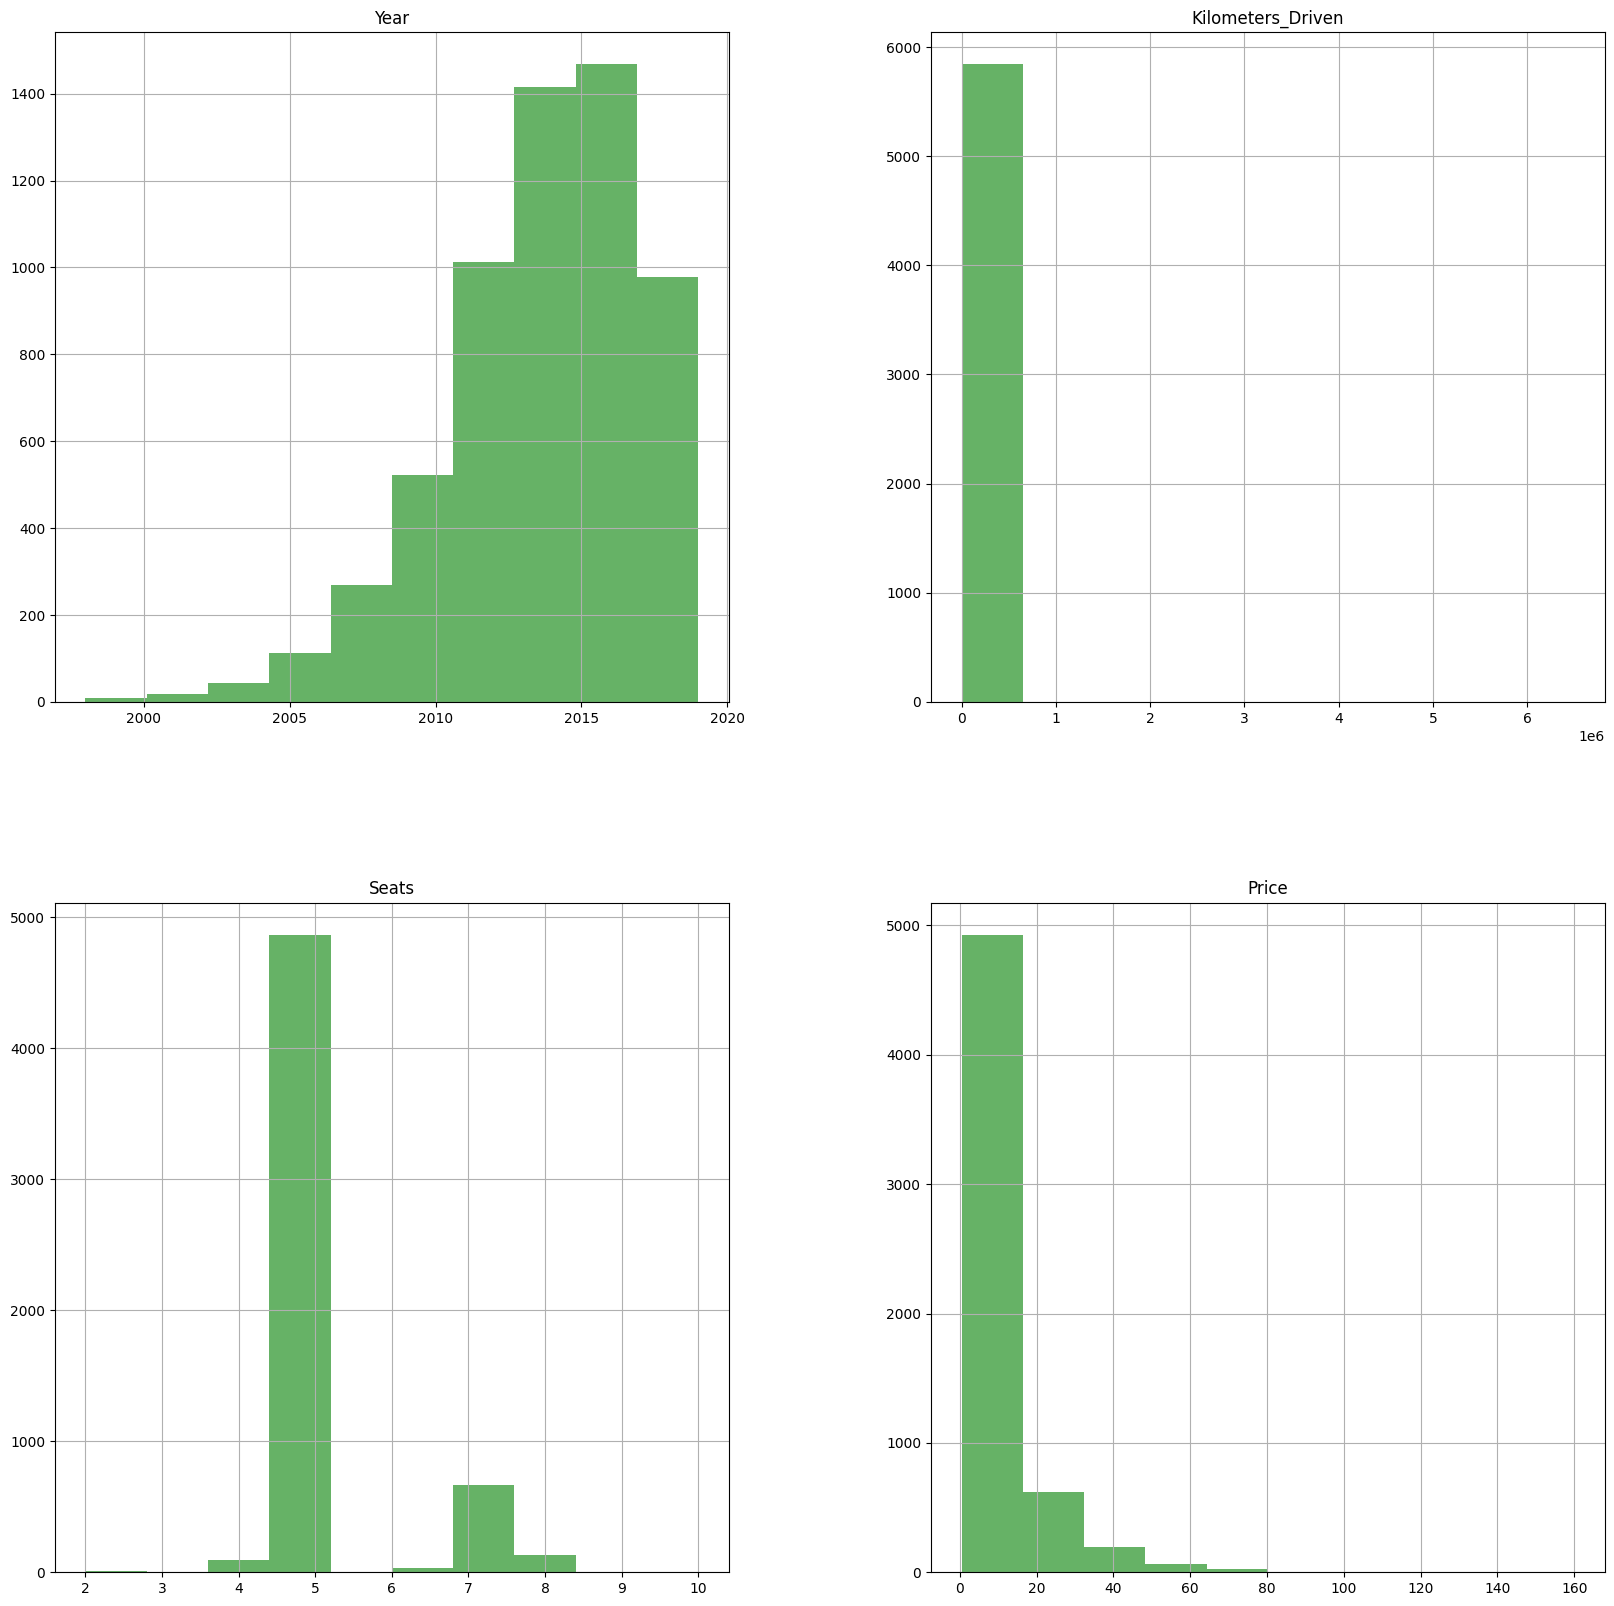

In [163]:
data.hist(figsize=(20,20),color='g',alpha=0.6)

#### 2. Statistical Analysis:

In [164]:
print(data.isnull().sum())

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64


In [165]:
data['Engine'] = data['Engine'].str.replace(r'(?i)cc$', '', regex=True).astype(float)
data['Power'] = data['Power'].str.replace(r'bhp$', '', regex=True).astype(float)
data['Mileage'] = data['Mileage'].str.replace(r'(kmpl|km/kg)$', '', regex=True).astype(float)

In [166]:
data.drop(columns=["Name", "New_Price"], inplace=True)

In [167]:
original_data = data.copy()
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,13.00,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [168]:
categorical_columns = data.select_dtypes(include='object').columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [169]:
data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,2011,46000,13.00,1199.0,88.70,5.0,4.50,False,True,False,...,False,False,False,False,False,True,True,False,False,False
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,False,False,True,...,False,False,False,False,False,False,False,False,True,False
6,2013,86999,23.08,1461.0,63.10,5.0,3.50,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [170]:
for col in data.select_dtypes(include=np.number).columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

C:\Users\Aakash\AppData\Local\Temp\ipykernel_22024\3862879161.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\Aakash\AppData\Local\Temp\ipykernel_22024\3862879161.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [171]:
data.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
Year,1.000000,-0.169514,0.300556,-0.065935,0.017388,0.010770,0.299947,-0.048356,-0.128122,0.214301,...,0.228228,-0.031353,-0.011403,-0.108167,0.000299,-0.116306,-0.087563,-0.068921,-0.298800,-0.222275
Kilometers_Driven,-0.169514,1.000000,-0.061994,0.092984,0.033142,0.082992,-0.008592,-0.000499,0.103403,-0.043152,...,-0.051967,-0.050860,-0.057598,0.041254,-0.002285,-0.106253,0.024452,0.026425,0.059910,0.044202
Mileage,0.300556,-0.061994,1.000000,-0.622108,-0.523026,-0.320110,-0.331553,-0.082367,0.005334,-0.025090,...,0.034357,0.075196,-0.080885,-0.020908,0.000134,-0.123045,0.355718,-0.036496,-0.123781,-0.070844
Engine,-0.065935,0.092984,-0.622108,1.000000,0.864941,0.400310,0.655371,0.080436,0.001695,0.052918,...,-0.024384,-0.077700,0.029823,-0.037173,-0.021443,-0.422848,-0.496926,0.012930,0.048778,0.024956
Power,0.017388,0.033142,-0.523026,0.864941,1.000000,0.098841,0.770924,0.086666,-0.029475,0.075772,...,0.010486,-0.070034,0.063180,-0.055154,-0.019520,-0.284319,-0.640389,-0.006507,0.030740,0.001789
Seats,0.010770,0.082992,-0.320110,0.400310,0.098841,1.000000,0.053739,0.015040,0.012857,0.008514,...,-0.029380,-0.045677,-0.007490,-0.002053,-0.006545,-0.308875,0.076739,0.027171,-0.003640,0.012426
Price,0.299947,-0.008592,-0.331553,0.655371,0.770924,0.053739,1.000000,0.085950,-0.044764,0.169864,...,0.051472,-0.109192,-0.002101,-0.080305,0.005285,-0.318392,-0.584123,-0.020481,-0.069747,-0.051137
Location_Bangalore,-0.048356,-0.000499,-0.082367,0.080436,0.086666,0.015040,0.085950,1.000000,-0.075347,-0.088031,...,-0.088733,-0.079493,-0.097976,-0.084790,-0.004682,-0.034026,-0.064681,0.010084,0.110955,0.031697
Location_Chennai,-0.128122,0.103403,0.005334,0.001695,-0.029475,0.012857,-0.044764,-0.075347,1.000000,-0.103543,...,-0.104369,-0.093501,-0.115241,-0.099732,0.028315,-0.035772,0.026626,0.022820,0.069746,0.112269
Location_Coimbatore,0.214301,-0.043152,-0.025090,0.052918,0.075772,0.008514,0.169864,-0.088031,-0.103543,1.000000,...,-0.121939,-0.109242,-0.134641,-0.116521,-0.006434,-0.012890,-0.075397,0.002038,-0.055622,-0.042385


<Axes: >

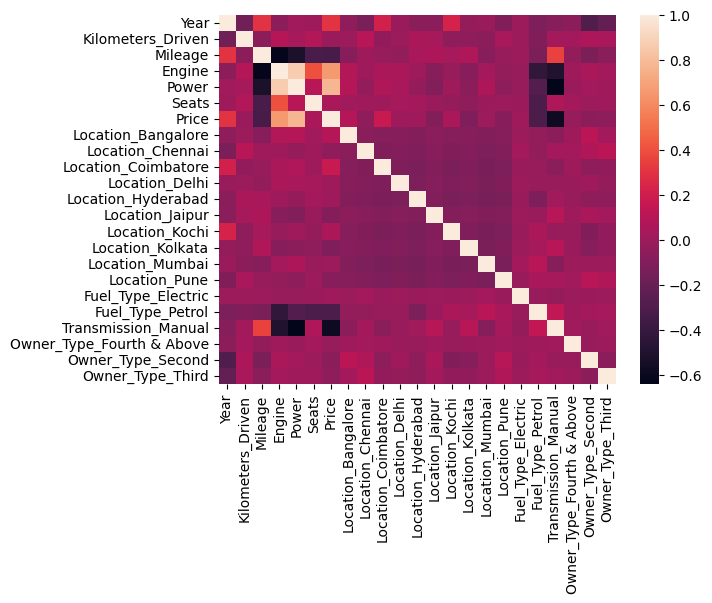

In [172]:
sns.heatmap(data.corr(), fmt=".2f")

Text(0.5, 1.0, 'Scatter Plot of Mileage vs Power')

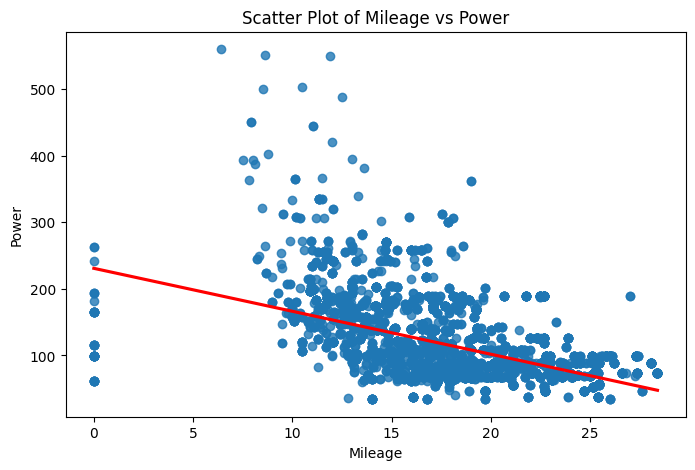

In [173]:
plt.figure(figsize=(8,5))
# sns.scatterplot(x=data['Mileage'], y=data['Power'])
sns.regplot(x=data['Mileage'], y=data['Power'], ci=None, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("Mileage")
plt.ylabel("Power")
plt.title("Scatter Plot of Mileage vs Power")

#### 3. Data Manipulation:

In [ ]:
# Cleaning Using central tendencies
#   Median for numerical values
#   Mode for categorical values

for col in data.select_dtypes(include=np.number).columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

In [ ]:
# One-Hot Encoding for categorical data
categorical_columns = data.select_dtypes(include='object').columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [ ]:
# Removing outliers
for col in data.select_dtypes(include=np.number).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(outliers)
    if not outliers.empty:
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

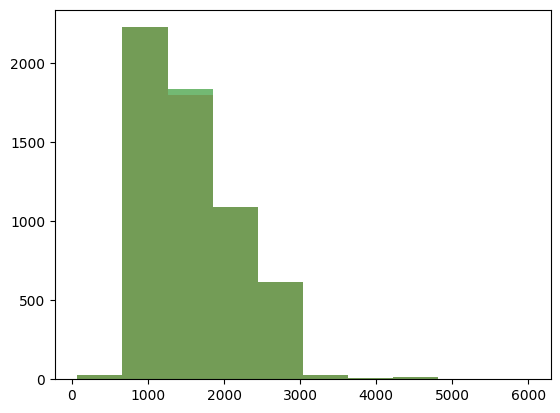

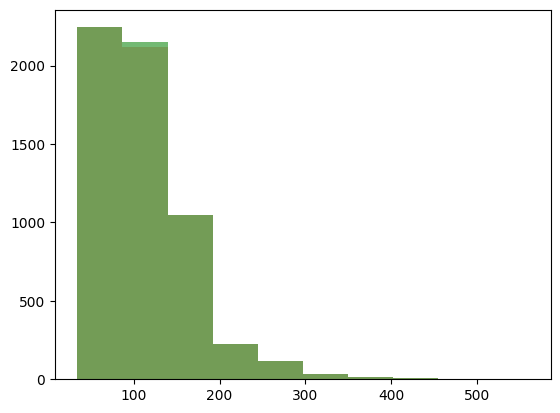

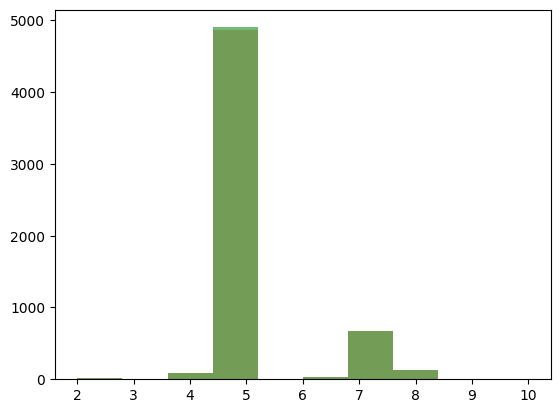

In [ ]:
# How replacing missing values with central tendency changes central value
changed_columns = ["Engine", "Power", "Seats"]
for column in changed_columns:
    plt.hist(original_data[column].dropna(), bins=10, alpha=0.25, color='red', label='Original')  # Original data
    plt.hist(data[column].dropna(), bins=10, alpha=0.55, color='green', label='Cleaned')  # Cleaned data
    plt.show()

#### 4. Data Preprocessing:

In [ ]:
# Normalization

numerical_columns = data.select_dtypes(include=np.number).columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [190]:
data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
1,0.485672,-0.188479,0.346901,-0.081186,0.232428,-0.353835,0.252440,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,-0.766411,-0.134350,-1.183924,-0.719352,-0.465388,-0.353835,-0.457095,False,True,False,...,False,False,False,False,False,True,True,False,False,False
3,-0.453390,0.309509,0.599361,-0.637706,-0.464272,2.132791,-0.324057,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,-0.140370,-0.192051,-0.679004,0.561979,0.504111,-0.353835,0.717185,False,False,True,...,False,False,False,False,False,False,False,False,True,False
6,-0.140370,0.309498,1.129527,-0.282799,-0.941764,-0.353835,-0.545786,False,False,False,...,False,False,False,False,False,False,True,False,False,False


#### 5. Data-Specific Analysis

<Axes: >

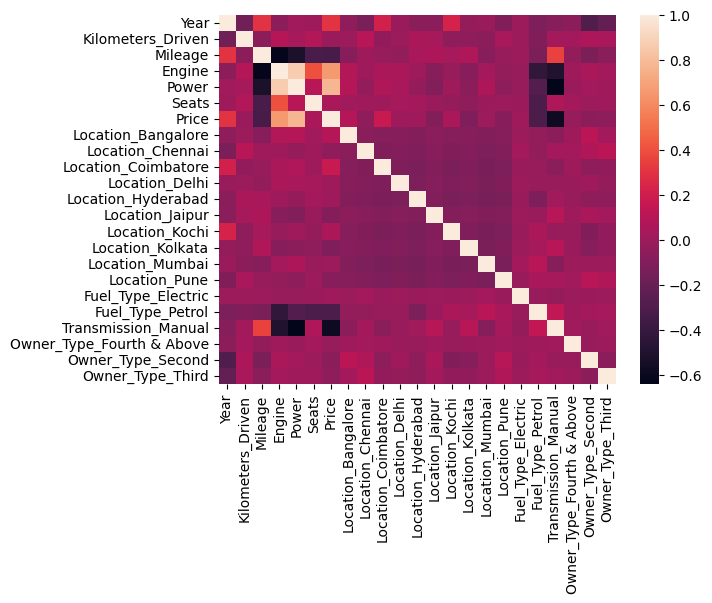

In [191]:
sns.heatmap(data.corr(), fmt=".2f")

- Top factors influencing price:
    - Transmission type
    - Fuel Type
    - Mileage
    - Power
    - Engine Capacity
